In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
import tensorflow as tf
%matplotlib inline

In [ ]:

housing = pd.read_csv("/content/housing.csv")
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
housing.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
housing.isnull().sum()


,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,207
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


In [ ]:
housing["ocean_proximity"].value_counts()

,count
ocean_proximity,
<1H OCEAN,9136
INLAND,6551
NEAR OCEAN,2658
NEAR BAY,2290
ISLAND,5


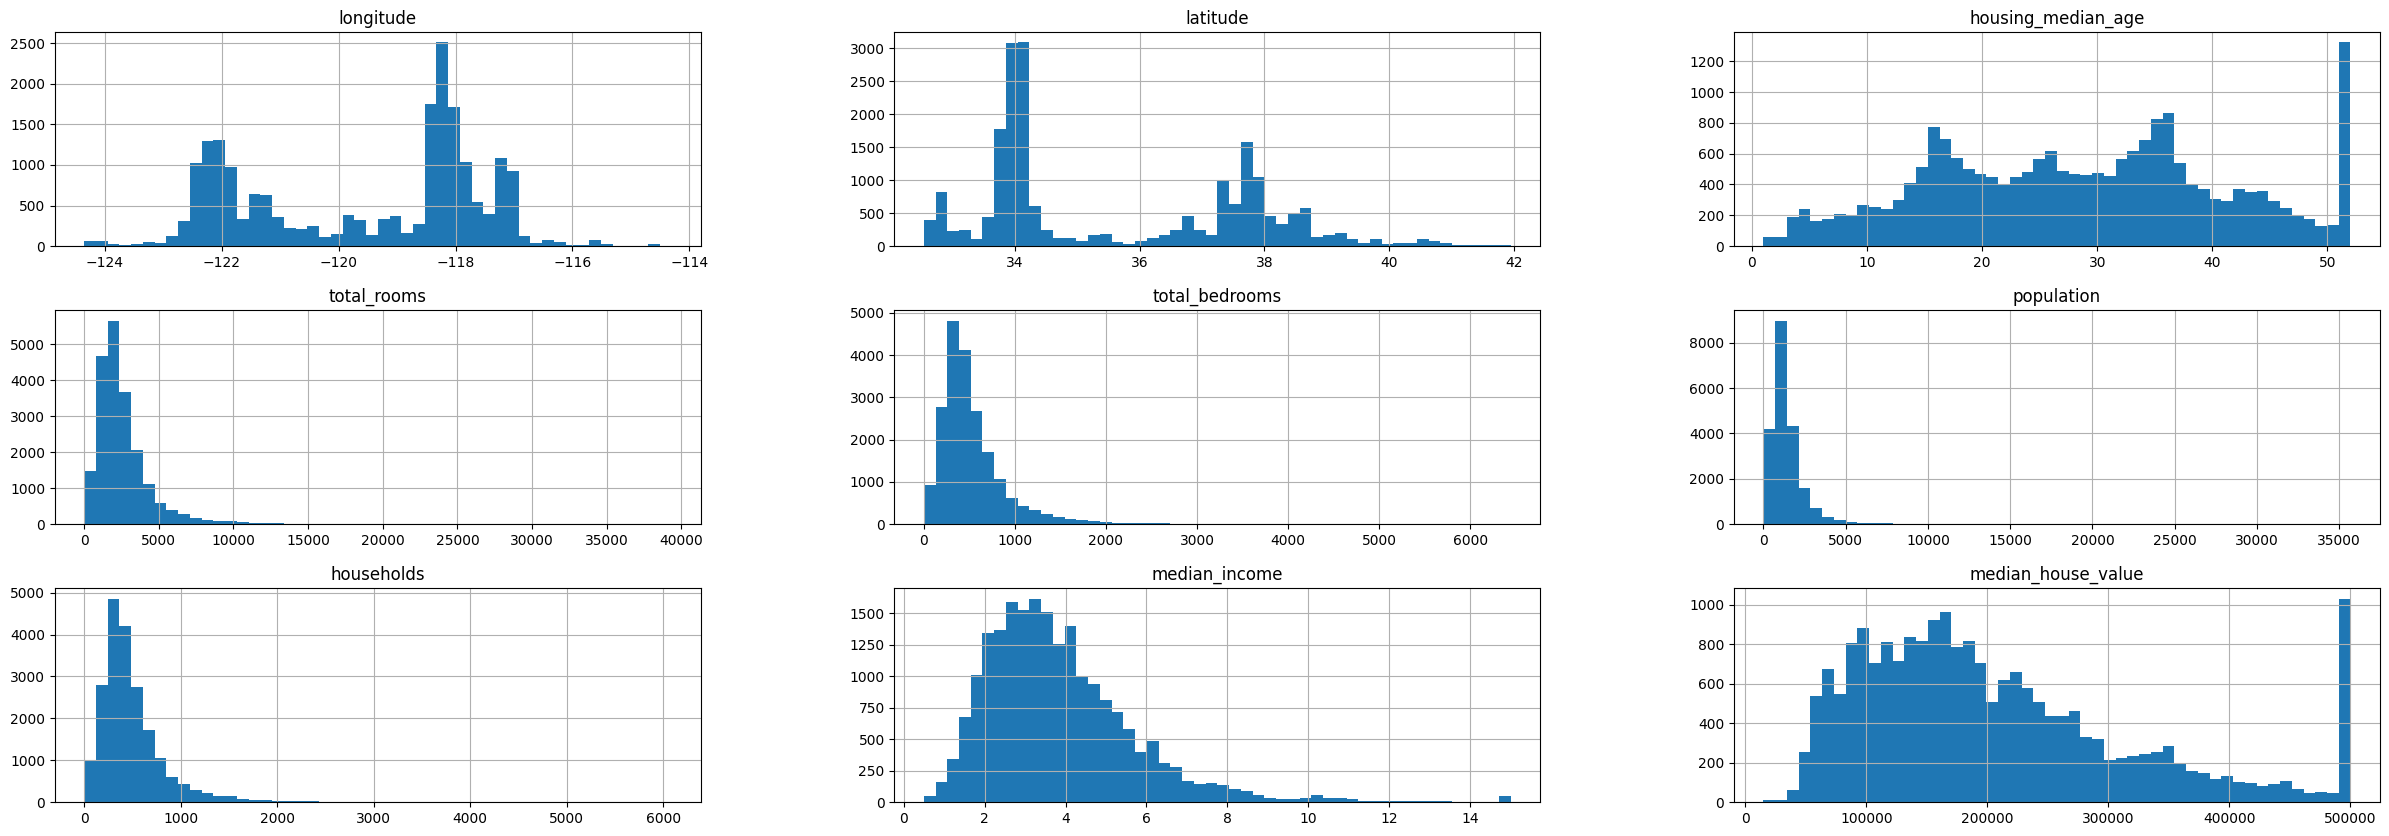

In [ ]:
housing.hist(bins=50,figsize=(30,10))
plt.show()

In [ ]:
housing["median_income"].sample(10)

,median_income
9291,4.1289
18568,3.6000
6470,4.8594
1553,7.6473
12778,1.6033
1697,6.2073
9271,6.4092
17604,5.3955
16155,3.0877
16136,6.1407


In [ ]:
housing["income_cat"] = pd.cut(housing["median_income"],bins=[0.,1.5, 3.0,4.5,6.0,np.inf],labels=[1,2,3,4,5])


<Axes: >

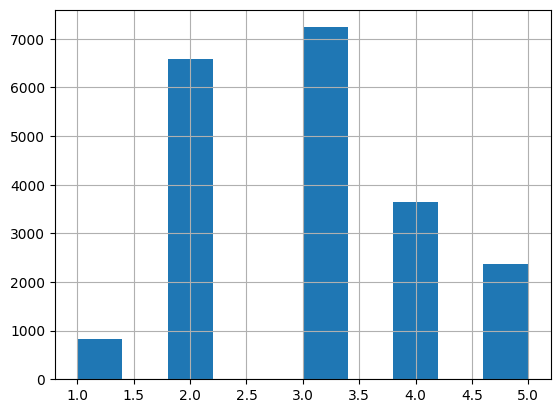

In [ ]:

housing["income_cat"].hist()

In [ ]:

from sklearn.model_selection import StratifiedShuffleSplit as sss

split = sss(n_splits=1,test_size=0.2,random_state=42)
for train_index , test_index in split.split(housing,housing["income_cat"]): # split.split will return index only not complete data/features
  strat_train_set = housing.loc[train_index]
  strat_test_set = housing.loc[test_index]

In [ ]:

# Removing Income_cat to get original datasets
for set_ in (strat_train_set,strat_test_set):
  set_.drop("income_cat",axis=1,inplace=True)

In [ ]:
# Generating Copy of original data

housing = strat_train_set.copy()



<Axes: xlabel='longitude', ylabel='latitude'>

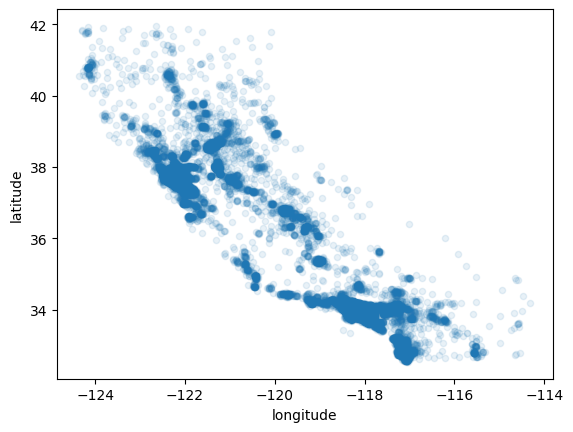

In [ ]:

# Visualizing  the Geographical data
housing.plot(kind="scatter",x="longitude",y="latitude",alpha=0.1)

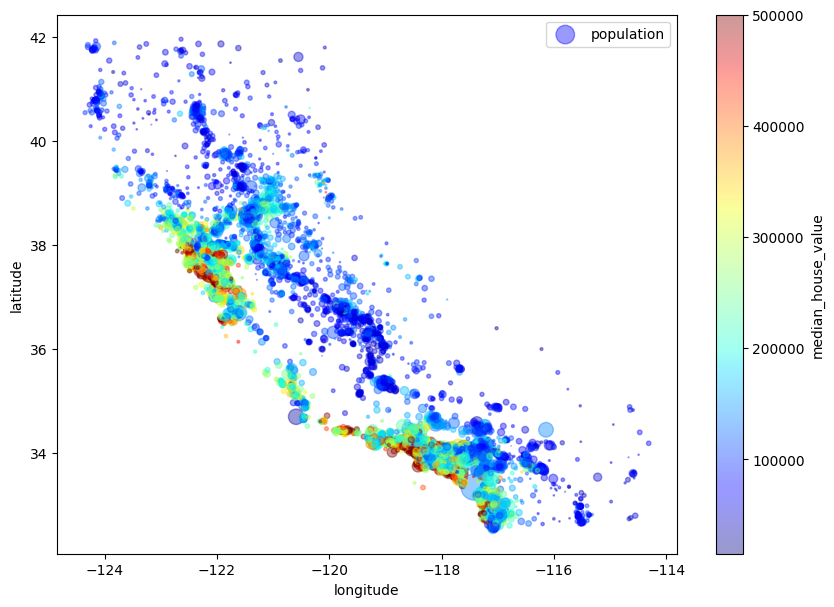

In [ ]:
housing.plot(kind="scatter",x="longitude",y="latitude",alpha=0.4,
             s=housing["population"]/100,label="population",figsize=(10,7),
             c="median_house_value",cmap=plt.get_cmap("jet"),colorbar=True,)
plt.legend()

In [ ]:

# Finding Correlation wrt median house values

corr_matrix = housing.drop("ocean_proximity",axis=1).corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

,median_house_value
median_house_value,1.000000
median_income,0.687151
total_rooms,0.135140
housing_median_age,0.114146
households,0.064590
total_bedrooms,0.047781
population,-0.026882
longitude,-0.047466
latitude,-0.142673


array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='total_rooms', ylabel='median_house_value'>,
        <Axes: xlabel='housing_median_age', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='total_rooms', ylabel='median_income'>,
        <Axes: xlabel='housing_median_age', ylabel='median_income'>],
       [<Axes: xlabel='median_house_value', ylabel='total_rooms'>,
        <Axes: xlabel='median_income', ylabel='total_rooms'>,
        <Axes: xlabel='total_rooms', ylabel='total_rooms'>,
        <Axes: xlabel='housing_median_age', ylabel='total_rooms'>],
       [<Axes: xlabel='median_house_value', ylabel='housing_median_age'>,
        <Axes: xlabel='median_income', ylabel='housing_median_age'>,
        <Axes: xlabel='total_rooms', ylabel='housi

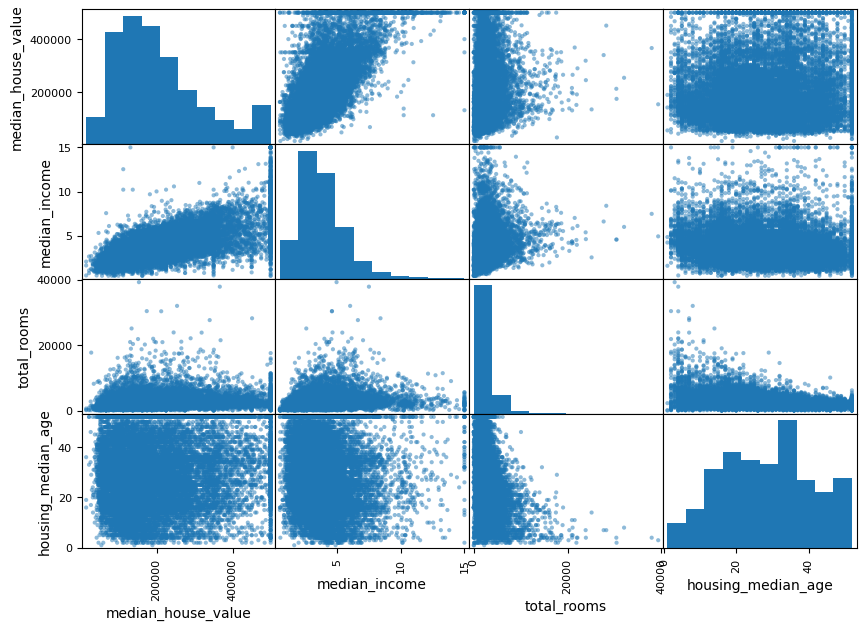

In [ ]:

# usig numpy.scatter_matrix to find correlation

from pandas.plotting import scatter_matrix

attributes = ["median_house_value","median_income","total_rooms","housing_median_age"]
scatter_matrix(housing[attributes],figsize=(10,7))

<Axes: xlabel='median_income', ylabel='median_house_value'>

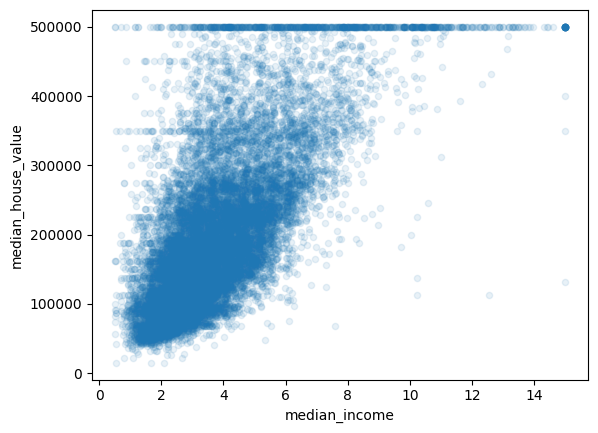

In [ ]:

housing.plot(kind="scatter",x="median_income",y="median_house_value",alpha=0.1)

In [ ]:

housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"] = housing["population"]/housing["households"]

In [ ]:

corr_matrix = housing.drop("ocean_proximity",axis=1).corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

,median_house_value
median_house_value,1.000000
median_income,0.687151
rooms_per_household,0.146255
total_rooms,0.135140
housing_median_age,0.114146
households,0.064590
total_bedrooms,0.047781
population_per_household,-0.021991
population,-0.026882
longitude,-0.047466


In [ ]:

#########Preprocessing Data
housing = strat_train_set.drop("median_house_value",axis=1)
housing_labels = strat_train_set["median_house_value"].copy

In [ ]:
# Getting Rid of missing values

#### Option1 : Drop null values indexes only
opt1_housing = housing.dropna(subset=["total_bedrooms"])
opt1_housing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16354 entries, 12655 to 19773
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16354 non-null  float64
 1   latitude            16354 non-null  float64
 2   housing_median_age  16354 non-null  float64
 3   total_rooms         16354 non-null  float64
 4   total_bedrooms      16354 non-null  float64
 5   population          16354 non-null  float64
 6   households          16354 non-null  float64
 7   median_income       16354 non-null  float64
 8   ocean_proximity     16354 non-null  object 
dtypes: float64(8), object(1)
memory usage: 1.2+ MB


In [ ]:

#### Option 2 : Drop the whole columns
opt2_housing = housing.drop("total_bedrooms",axis=1)
opt2_housing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 12655 to 19773
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   population          16512 non-null  float64
 5   households          16512 non-null  float64
 6   median_income       16512 non-null  float64
 7   ocean_proximity     16512 non-null  object 
dtypes: float64(7), object(1)
memory usage: 1.1+ MB


In [ ]:

#### Option 3 : Fill Missing values with median , mean , modes
median = housing["total_bedrooms"].median()
housing["total_bedrooms"].fillna(median,inplace=True)


<ipython-input-24-8e6e6a7af0a7>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  housing["total_bedrooms"].fillna(median,inplace=True)


In [ ]:

### Using SimpleImputer to Control Missing Values to can be used in test set as well

from sklearn.impute import SimpleImputer

impute = SimpleImputer(strategy="median")

housing_num = housing.drop("ocean_proximity",axis=1)

# fitting the imputer on training data

impute.fit(housing_num)


# checking Imputer for statistics
impute.statistics_

# housing_num.median().values


X = impute.transform(housing_num)

housing_tr = pd.DataFrame(X,columns=housing_num.columns)

In [ ]:
from sklearn.preprocessing import OrdinalEncoder


ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing[["ocean_proximity"]])
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [ ]:
housing_cat_encoded[:5]

array([[1.],
       [4.],
       [1.],
       [4.],
       [0.]])

In [38]:
# Ordinal Encoding
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing[["ocean_proximity"]])  # It return numpy array
# ordinal_encoder.categories_
housing_cat_encoded[:5]

array([[1.],
       [4.],
       [1.],
       [4.],
       [0.]])

In [42]:
# One Hot Encoding

from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()

housing_cat_1hot = cat_encoder.fit_transform(housing[["ocean_proximity"]])
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [44]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [43]:
housing_cat_1hot.toarray()

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [48]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]